https://zindi.africa/competitions/adbot-ad-engagement-forecasting-challenge/data

In [25]:
# for analysis and data processing
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# for modelling
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,f1_score
from sklearn.metrics import confusion_matrix, precision_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import shap

In [26]:
def read_data(path_to_csv_file):
    '''
    Reads csv files from specified paths

    Parameters:
            path to csv file locations
    Returns:
            dataframes of imported csv files
    '''
    # Read CSV files
    df = pd.read_csv(path_to_csv_file)
    
    return df

# call the function to import train data - update with relevant paths
train = read_data('C:/Users/leemn/Downloads/zindi_train.csv')

In [27]:
def df_snapshot(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return display(df.head())

print(f'train:')
df_snapshot(train)

train:


,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,start_time,duration,end_time,display_location,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len
0,142.0,15.0,3393.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,5.0,11.0
1,89.0,8.0,1817.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,13.0
2,59.0,8.0,1743.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,10.0
3,78.0,4.0,917.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,3.0,13.0
4,20.0,1.0,217.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,13.0


In [28]:
def data_types(df):
    '''
    Returns datatype of fields in a dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return df.info()

print(f'has_uninstalled_train:')
data_types(train)

has_uninstalled_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289926 entries, 0 to 289925
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   impressions         289526 non-null  float64
 1   clicks              289526 non-null  float64
 2   cost                289526 non-null  float64
 3   conversions         289526 non-null  float64
 4   ad_type             289526 non-null  object 
 5   currency            289526 non-null  object 
 6   ID                  289926 non-null  object 
 7   date                289926 non-null  object 
 8   call_type           36900 non-null   object 
 9   call_status         36900 non-null   object 
 10  start_time          36900 non-null   object 
 11  duration            36900 non-null   float64
 12  end_time            36900 non-null   object 
 13  display_location    36900 non-null   object 
 14  impression_share    289926 non-null  float64
 15  conversions

In [29]:
def convert_event_time_to_datetime(df,column):
    """
    Returns a dataframe with converted event_timestamp field from object to datetime
    
    Parameters:
        df (DataFrame): Pandas dataframe
        column (Object): Object field to datetime
    
    """
    df[column] = pd.to_datetime(df[column])
    
    return df

# convert in train
convert_event_time_to_datetime(train,'start_time')
convert_event_time_to_datetime(train,'end_time')
convert_event_time_to_datetime(train,'date')

,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,start_time,duration,end_time,display_location,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len
0,142.0,15.0,3393.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaT,NaN,NaT,NaN,16.279669,0.0,2.0,5.0,11.0
1,89.0,8.0,1817.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaT,NaN,NaT,NaN,16.279669,0.0,2.0,2.0,13.0
2,59.0,8.0,1743.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaT,NaN,NaT,NaN,16.279669,0.0,2.0,2.0,10.0
3,78.0,4.0,917.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaT,NaN,NaT,NaN,16.279669,0.0,2.0,3.0,13.0
4,20.0,1.0,217.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaT,NaN,NaT,NaN,16.279669,0.0,2.0,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289921,NaN,NaN,NaN,NaN,NaN,NaN,ID_65687e2b40ea026fcc662a75,2024-02-03,NaN,NaN,NaT,NaN,NaT,NaN,12.035682,0.0,NaN,NaN,NaN
289922,NaN,NaN,NaN,NaN,NaN,NaN,ID_65687e2b40ea026fcc662a75,2024-02-04,NaN,NaN,NaT,NaN,NaT,NaN,15.711023,0.0,NaN,NaN,NaN
289923,NaN,NaN,NaN,NaN,NaN,NaN,ID_65a7bf329fa4627faf28390c,2024-02-03,NaN,NaN,NaT,NaN,NaT,NaN,15.464425,0.0,NaN,NaN,NaN
289924,NaN,NaN,NaN,NaN,NaN,NaN,ID_65b0f65c7fe62e56c5593d55,2024-02-03,NaN,NaN,NaT,NaN,NaT,NaN,10.016481,0.0,NaN,NaN,NaN


In [30]:
def null_checker(df):
    '''
    Returns the count of rows found in the data frame where there is a null present.

    Parameters:
        df (Dataframe): Pandas dataframe

    Returns:
        Prints the null count, null percentage, and row count per column.
    '''
    row_count = len(df)
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_percentages = (null_counts / row_count) * 100
    combined = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])
    combined['Row Count'] = row_count
    print(combined)

# check nulls in train
print(f'train:')
null_checker(train)

train:
                    Null Count  Null Percentage  Row Count
call_status             253026        87.272614     289926
start_time              253026        87.272614     289926
display_location        253026        87.272614     289926
end_time                253026        87.272614     289926
duration                253026        87.272614     289926
call_type               253026        87.272614     289926
conversions_calls         9855         3.399143     289926
headline2_len              400         0.137966     289926
headline1_len              400         0.137966     289926
impressions                400         0.137966     289926
clicks                     400         0.137966     289926
currency                   400         0.137966     289926
ad_type                    400         0.137966     289926
conversions                400         0.137966     289926
cost                       400         0.137966     289926
ad_description_len         400         0.137966  

In [32]:
import pandas as pd

def drop_columns_high_missing_values(df, threshold=0.8):
    """
    Drop columns from a DataFrame where the proportion of missing values is greater than a specified threshold.

    Parameters:
    - df: pandas.DataFrame - The DataFrame to process.
    - threshold: float - Proportion threshold of missing values (default is 0.8).

    Returns:
    - pandas.DataFrame - The DataFrame after removing columns with high missing values.
    """
    # Calculate the proportion of missing values for each column
    missing_proportion = df.isnull().mean()
    # Identify columns where the missing value proportion is greater than the threshold
    columns_to_drop = missing_proportion[missing_proportion > threshold].index
    # Drop these columns from the DataFrame
    df_dropped = df.drop(columns=columns_to_drop)
    # Optionally, return the list of dropped columns too, if needed
    return df_dropped, columns_to_drop

# Example usage:
train_clean, dropped_columns = drop_columns_high_missing_values(train)


In [33]:
def drop_rows_low_missing_values(df, threshold=0.05):
    """
    Drop rows with missing values in columns where the proportion of missing values is less than a specified threshold.

    Parameters:
    - df: pandas.DataFrame - The DataFrame to process.
    - threshold: float - Proportion threshold of missing values (default is 0.05).

    Returns:
    - pandas.DataFrame - The DataFrame after removing rows with missing values in columns under the threshold.
    """
    # Calculate the proportion of missing values for each column
    missing_proportion = df.isnull().mean()
    
    # Identify columns where the missing value proportion is less than the threshold
    columns_low_missing = missing_proportion[missing_proportion <= threshold].index
    
    # Drop rows where any of these columns have missing values
    df_cleaned = df.dropna(subset=columns_low_missing)
    
    return df_cleaned

# Example usage:
train_clean = drop_rows_low_missing_values(train_clean)

In [18]:
def convert_date_extract_weekday(df):
    """
    Extract day of the week from date column.
    Adds 'day_of_week' to the dataframe.
    """
    df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
    return df

train_clean = convert_date_extract_weekday(train_clean)

In [21]:
def create_metrics(df):
    """
    Create new metrics including CTR, CPC, and conversion rate.
    """
    df['CTR'] = (df['clicks'] / df['impressions']) * 100
    df['CPC'] = df['cost'] / df['clicks']
    df['conversion_rate'] = (df['conversions'] / df['clicks']) * 100
    #df.replace([np.inf, -np.inf], pd.NA, inplace=True)  # Replace infinities with NaN
    return df

train_clean = create_metrics(train_clean)

In [38]:
def drop_unused_columns(df, columns_to_drop):
    """
    Drop specified columns from the DataFrame.
    
    Parameters:
    - df: pandas.DataFrame - The DataFrame to process.
    - columns_to_drop: list - A list of column names to drop from the DataFrame.
    
    Returns:
    - pandas.DataFrame - The DataFrame after removing specified columns.
    """
    df = df.drop(columns=columns_to_drop)
    return df

train_clean = drop_unused_columns(train_clean, ['ad_type', 'currency'])


In [49]:
from sklearn.model_selection import train_test_split

X = train_clean.drop(columns=['clicks','ID','date'])  # Assuming 'clicks' is the target variable
y = train_clean['clicks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a function to train and evaluate models
def train_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

In [51]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_rmse = train_evaluate(lr_model, X_train, X_test, y_train, y_test)
rf_rmse = train_evaluate(rf_model, X_train, X_test, y_train, y_test)

In [52]:
print(lr_rmse), print(rf_rmse)

22.340284553169163
5.560557032606558


(None, None)

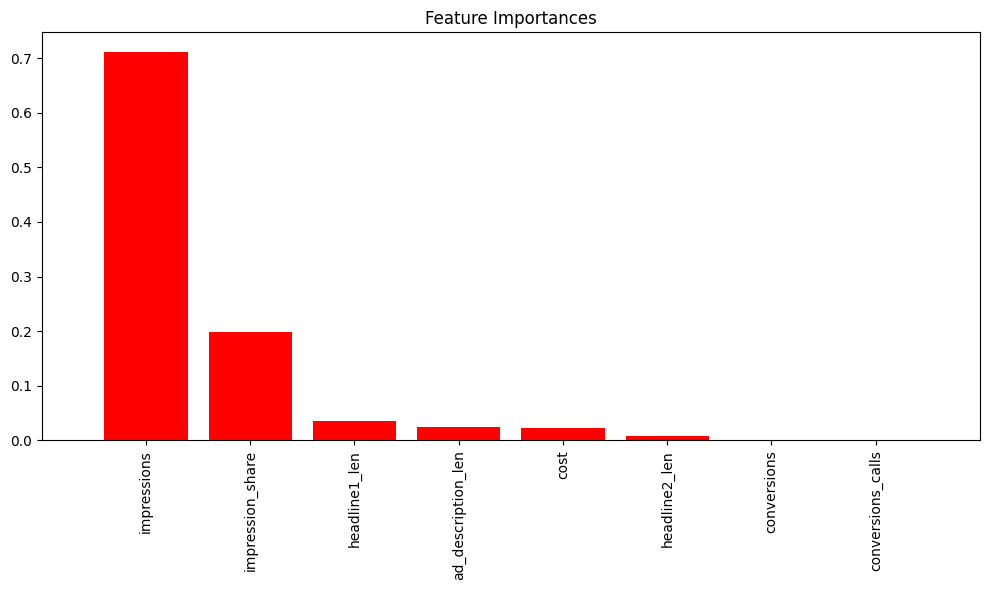

In [57]:
def plot_feature_importances(model, feature_names):
    """
    Plots feature importances of a fitted model.
    
    Parameters:
    - model: The trained model.
    - feature_names: Names of the features used in the model.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importances of the model
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], color="r", align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.tight_layout()
    plt.show()

# Example usage
plot_feature_importances(rf_model, X_train.columns)

#### Top 5 Predictors identified by the Random Forest model:
- Impressions: High feature importance, which makes sense as more impressions generally lead to more opportunities for clicks.
- Impression Share: Indicates the percentage of times the ad was shown when it could have been, again directly linked to visibility.
- Headline1 Length: Suggests that the length of the first headline in the ad could be crucial in attracting clicks.
- Ad Description Length: The length and possibly the quality of the ad description also play a significant role.
- Cost: Investment in the ad may correlate with its prominence or quality, affecting click rates.

In [63]:
# Predict targets for the next week and the following week
# This could involve using the date column to select the appropriate timeframe or adjusting the model input to simulate 'next week' conditions
predictions_next_week = rf_model.predict(X)  # Placeholder: adjust to use model correctly
predictions_following_week = rf_model.predict(X)  # Placeholder: adjust to use model correctly

# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'ID': IDs,
    'Target': predictions_next_week,  # or some function to combine or select predictions
    'feature_1': X['impression_share'],
    'feature_2': X['headline1_len'],
    'feature_3': X['cost'],
    'feature_4': X['impressions'],
    'feature_5': X['ad_description_len']
})

# Add a row for the following week's prediction, assuming separate rows needed
additional_rows = pd.DataFrame({
    'ID': IDs,
    'Target': predictions_following_week,
    'feature_1': X['impression_share'],
    'feature_2': X['headline1_len'],
    'feature_3': X['cost'],
    'feature_4': X['impressions'],
    'feature_5': X['ad_description_len']
})

# Combine both weeks into one DataFrame if required or adjust according to submission guidelines
submission_df = pd.concat([submission_df, additional_rows])

# Save the submission file
submission_df.head()

,ID,Target,feature_1,feature_2,feature_3,feature_4,feature_5
0,ID_5da86e71bf5dee4cf5047046,15.92,16.279669,2.0,3393.0,142.0,11.0
1,ID_5da86e71bf5dee4cf5047046,9.05,16.279669,2.0,1817.0,89.0,13.0
2,ID_5da86e71bf5dee4cf5047046,8.25,16.279669,2.0,1743.0,59.0,10.0
3,ID_5da86e71bf5dee4cf5047046,4.77,16.279669,2.0,917.0,78.0,13.0
4,ID_5da86e71bf5dee4cf5047046,1.11,16.279669,2.0,217.0,20.0,13.0


In [65]:
submission_df = submission_df.head(371)

In [66]:
submission_df.to_csv('C:/Users/leemn/Downloads/subm.csv')